In [1]:
#import all necessary libs

import pandas as pd
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import scipy

In [2]:
#reading the WHO csv
#created a new (binary) var called had_polio
#also created a pristine version of the dataframe, so i can re-copy it when necessary

who_data_original = pd.read_csv("who_data.csv", sep=";", index_col=0)
who_data_original['had_polio'] = np.where(who_data_original['WHS3_49']>0, 1, 0)
who_data = who_data_original.copy()


In [3]:
#print all graphs

'''
for i in list(who_data)[2:]:
    plt.scatter(x=who_data[i], y=who_data["WHOSIS_000001"])
    plt.title(i)
    plt.show()
    
plt.show()'''

'\nfor i in list(who_data)[2:]:\n    plt.scatter(x=who_data[i], y=who_data["WHOSIS_000001"])\n    plt.title(i)\n    plt.show()\n    \nplt.show()'

In [4]:
#regression with all variables

who_data = who_data_original.copy()
who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + UHC_AVAILABILITY_SCORE + VIOLENCE_HOMICIDERATE + WHS3_49 + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + M_Est_tob_curr_std + had_polio', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     62.08
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           7.80e-42
Time:                        23:53:41   Log-Likelihood:                -392.72
No. Observations:                 146   AIC:                             803.4
Df Residuals:                     137   BIC:                             830.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 65.3540      5.795     11.278      0.000      53.895      76.812
MH_12                                     -0.2356      0.030     -7.737      0.000      -0.296      -0.175
NCD_BMI_MEANC                              0.7519      0.186      4.053      0.000       0.385       1.119
UHC_AVAILABILITY_SCORE                    -0.0222      0.025     -0.884      0.378      -0.072       0.027
VIOLENCE_HOMICIDERATE                     -0.1286      0.034     -3.781      0.000      -0.196      -0.061
WHS3_49                                   -0.0188      0.077     -0.245      0.806      -0.170       0.133
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3140      0.030    -10.498      0.000      -0.373      -0.255
M_Est_tob_curr_std                         0.0665      0.036      1.848      0.067      -0.005       0.138
had_polio                                 -2.3946      1.869     -1.281      0.202      -6.091       1.302
==============================================================================
Omnibus:                        2.123   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.346   Jarque-Bera (JB):                1.670
Skew:                           0.232   Prob(JB):                        0.434
Kurtosis:                       3.242   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#regression with all variables minus WHS3_49

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + UHC_AVAILABILITY_SCORE + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + M_Est_tob_curr_std + had_polio', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     66.62
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           7.31e-43
Time:                        23:53:41   Log-Likelihood:                -432.49
No. Observations:                 158   AIC:                             881.0
Df Residuals:                     150   BIC:                             905.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 73.9907      5.360     13.805      0.000      63.401      84.581
MH_12                                     -0.2521      0.030     -8.486      0.000      -0.311      -0.193
NCD_BMI_MEANC                              0.4375      0.171      2.555      0.012       0.099       0.776
UHC_AVAILABILITY_SCORE                    -0.0118      0.024     -0.486      0.628      -0.060       0.036
VIOLENCE_HOMICIDERATE                     -0.1160      0.032     -3.622      0.000      -0.179      -0.053
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3537      0.029    -12.186      0.000      -0.411      -0.296
M_Est_tob_curr_std                         0.0447      0.036      1.240      0.217      -0.027       0.116
had_polio                                 -2.5981      1.576     -1.649      0.101      -5.712       0.515
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.077
Skew:                           0.015   Prob(JB):                        0.962
Kurtosis:                       3.104   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
#regression with all variables minus WHS3_49, UHC_AVAILABILITY_SCORE

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + M_Est_tob_curr_std + had_polio', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     78.08
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           8.89e-44
Time:                        23:53:44   Log-Likelihood:                -432.61
No. Observations:                 158   AIC:                             879.2
Df Residuals:                     151   BIC:                             900.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 72.7555      4.706     15.461      0.000      63.458      82.053
MH_12                                     -0.2502      0.029     -8.518      0.000      -0.308      -0.192
NCD_BMI_MEANC                              0.4535      0.168      2.707      0.008       0.122       0.785
VIOLENCE_HOMICIDERATE                     -0.1179      0.032     -3.714      0.000      -0.181      -0.055
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3535      0.029    -12.211      0.000      -0.411      -0.296
M_Est_tob_curr_std                         0.0435      0.036      1.212      0.228      -0.027       0.114
had_polio                                 -2.6241      1.571     -1.671      0.097      -5.728       0.479
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.157
Skew:                           0.014   Prob(JB):                        0.924
Kurtosis:                       3.152   Cond. No.                         708.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#regression with all variables minus WHS3_49, UHC_AVAILABILITY_SCORE, M_Est_tob_curr_std

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.drop("M_Est_tob_curr_std", axis=1)
who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + had_polio', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.4
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.53e-49
Time:                        23:54:01   Log-Likelihood:                -502.10
No. Observations:                 181   AIC:                             1016.
Df Residuals:                     175   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 74.2537      4.666     15.914      0.000      65.045      83.462
MH_12                                     -0.2498      0.028     -8.814      0.000      -0.306      -0.194
NCD_BMI_MEANC                              0.4335      0.162      2.670      0.008       0.113       0.754
VIOLENCE_HOMICIDERATE                     -0.1183      0.025     -4.816      0.000      -0.167      -0.070
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3686      0.028    -13.116      0.000      -0.424      -0.313
had_polio                                 -1.9332      1.475     -1.310      0.192      -4.845       0.979
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.047
Skew:                           0.014   Prob(JB):                        0.977
Kurtosis:                       3.074   Cond. No.                         651.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#regression with all variables minus WHS3_49, UHC_AVAILABILITY_SCORE, M_Est_tob_curr_std, had_polio

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.drop("M_Est_tob_curr_std", axis=1)
who_data = who_data.drop("had_polio", axis=1)
who_data = who_data.dropna()


Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           3.01e-50
Time:                        23:54:04   Log-Likelihood:                -502.99
No. Observations:                 181   AIC:                             1016.
Df Residuals:                     176   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 73.4861      4.638     15.843      0.000      64.332      82.640
MH_12                                     -0.2473      0.028     -8.728      0.000      -0.303      -0.191
NCD_BMI_MEANC                              0.4629      0.161      2.873      0.005       0.145       0.781
VIOLENCE_HOMICIDERATE                     -0.1182      0.025     -4.803      0.000      -0.167      -0.070
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3723      0.028    -13.284      0.000      -0.428      -0.317
==============================================================================
Omnibus:                        0.465   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.263
Skew:                           0.082   Prob(JB):                        0.877
Kurtosis:                       3.088   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#F TEST
#NOTE: i will re-run the last regression but now with the right number of n, to do the F-Test.

who_data = who_data_original.copy()
who_data = who_data.dropna()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.drop("M_Est_tob_curr_std", axis=1)
who_data = who_data.drop("had_polio", axis=1)

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     120.7
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.61e-44
Time:                        23:54:08   Log-Likelihood:                -395.94
No. Observations:                 146   AIC:                             801.9
Df Residuals:                     141   BIC:                             816.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 62.8966      5.170     12.167      0.000      52.677      73.116
MH_12                                     -0.2223      0.030     -7.406      0.000      -0.282      -0.163
NCD_BMI_MEANC                              0.8530      0.181      4.701      0.000       0.494       1.212
VIOLENCE_HOMICIDERATE                     -0.1535      0.032     -4.798      0.000      -0.217      -0.090
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3267      0.029    -11.086      0.000      -0.385      -0.268
==============================================================================
Omnibus:                        4.086   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.566
Skew:                           0.332   Prob(JB):                        0.168
Kurtosis:                       3.381   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#TESTE F 2

'''
Ri 0.784
Rr 0.774
n 146
q numero de variaveis abandonadas 4
k numero de variaveis no primeiro modelo 8
'''

f_test = ((0.784-0.774)/4)/((1-0.784)/(146-8-1))
print(f_test)
f_crit = scipy.stats.f.ppf(q=1-.05, dfn=4, dfd=146-8-1)
print(f_crit)

#F-test has show to be not significative, this means
#we can exclude the 4 variables from the final model.

1.5856481481481497
2.437748980105296


In [11]:
#RESET TEST
#rerunning the regression

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.drop("M_Est_tob_curr_std", axis=1)
who_data = who_data.drop("had_polio", axis=1)
who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ MH_12 + NCD_BMI_MEANC + VIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     124.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           3.01e-50
Time:                        23:54:19   Log-Likelihood:                -502.99
No. Observations:                 181   AIC:                             1016.
Df Residuals:                     176   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 73.4861      4.638     15.843      0.000      64.332      82.640
MH_12                                     -0.2473      0.028     -8.728      0.000      -0.303      -0.191
NCD_BMI_MEANC                              0.4629      0.161      2.873      0.005       0.145       0.781
VIOLENCE_HOMICIDERATE                     -0.1182      0.025     -4.803      0.000      -0.167      -0.070
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3723      0.028    -13.284      0.000      -0.428      -0.317
==============================================================================
Omnibus:                        0.465   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.263
Skew:                           0.082   Prob(JB):                        0.877
Kurtosis:                       3.088   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#RESET TEST 2

reset = statsmodels.stats.diagnostic.linear_reset(res, power=2, test_type="fitted", use_f=True)
print(reset)

#Significative F-test, so there is error in the functional form of the model.

<F test: F=8.857600416422894, p=0.0033319088385695803, df_denom=175, df_num=1>


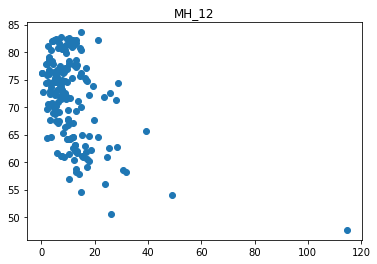

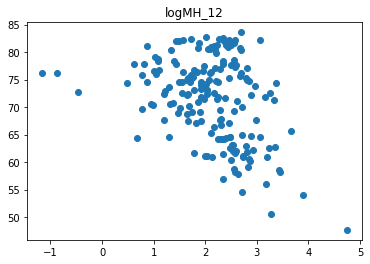

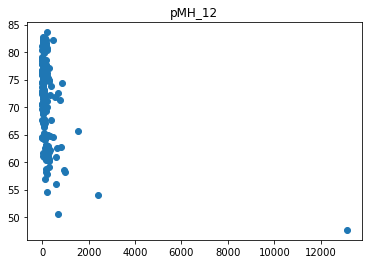

In [14]:
#lets check the graphs in log and power version, to find plausible relationships

plt.scatter(x=who_data['MH_12'], y=who_data["WHOSIS_000001"])
plt.title("MH_12")
plt.show()

who_data['logMH_12']= np.log(who_data['MH_12'])
plt.scatter(x=who_data['logMH_12'], y=who_data["WHOSIS_000001"])
plt.title("logMH_12")
plt.show()

who_data['pMH_12']= (who_data['MH_12'])**2
plt.scatter(x=who_data['pMH_12'], y=who_data["WHOSIS_000001"])
plt.title("pMH_12")
plt.show()


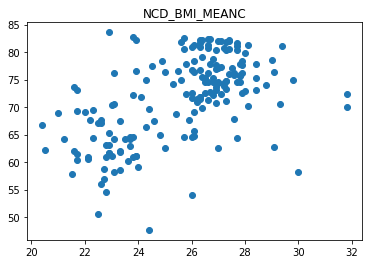

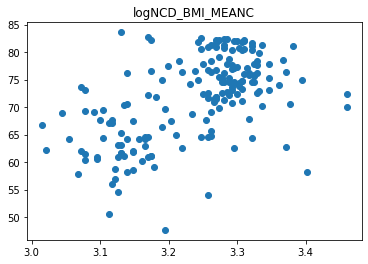

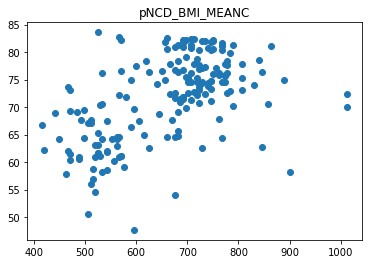

In [15]:
plt.scatter(x=who_data['NCD_BMI_MEANC'], y=who_data["WHOSIS_000001"])
plt.title("NCD_BMI_MEANC")
plt.show()

who_data['logNCD_BMI_MEANC']= np.log(who_data['NCD_BMI_MEANC'])
plt.scatter(x=who_data['logNCD_BMI_MEANC'], y=who_data["WHOSIS_000001"])
plt.title("logNCD_BMI_MEANC")
plt.show()

who_data['pNCD_BMI_MEANC']= (who_data['NCD_BMI_MEANC'])**2
plt.scatter(x=who_data['pNCD_BMI_MEANC'], y=who_data["WHOSIS_000001"])
plt.title("pNCD_BMI_MEANC")
plt.show()


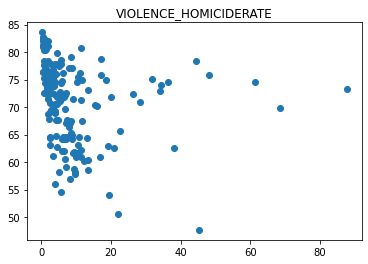

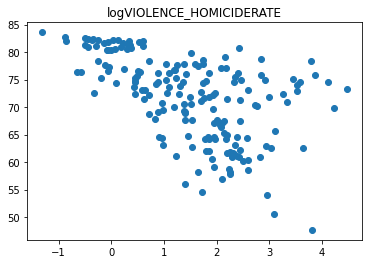

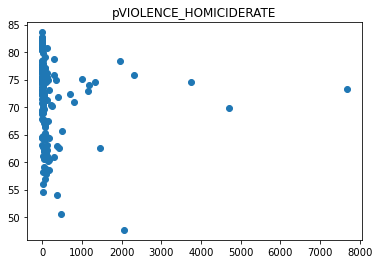

In [16]:
plt.scatter(x=who_data['VIOLENCE_HOMICIDERATE'], y=who_data["WHOSIS_000001"])
plt.title("VIOLENCE_HOMICIDERATE")
plt.show()

who_data['logVIOLENCE_HOMICIDERATE']= np.log(who_data['VIOLENCE_HOMICIDERATE'])
plt.scatter(x=who_data['logVIOLENCE_HOMICIDERATE'], y=who_data["WHOSIS_000001"])
plt.title("logVIOLENCE_HOMICIDERATE")
plt.show()

who_data['pVIOLENCE_HOMICIDERATE']= (who_data['VIOLENCE_HOMICIDERATE'])**2
plt.scatter(x=who_data['pVIOLENCE_HOMICIDERATE'], y=who_data["WHOSIS_000001"])
plt.title("pVIOLENCE_HOMICIDERATE")
plt.show()


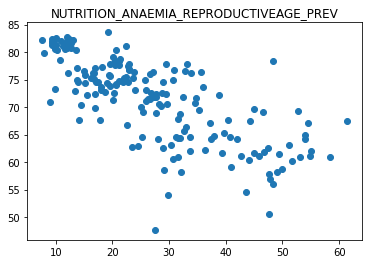

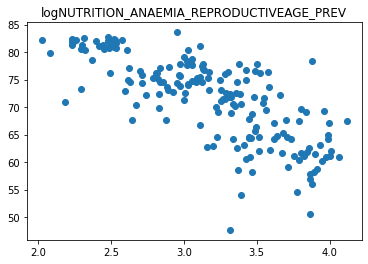

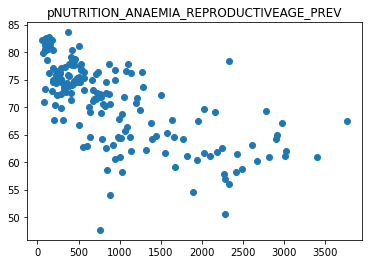

In [17]:
plt.scatter(x=who_data['NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV'], y=who_data["WHOSIS_000001"])
plt.title("NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV")
plt.show()

who_data['logNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']= np.log(who_data['NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV'])
plt.scatter(x=who_data['logNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV'], y=who_data["WHOSIS_000001"])
plt.title("logNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV")
plt.show()

who_data['pNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV']= (who_data['NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV'])**2
plt.scatter(x=who_data['pNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV'], y=who_data["WHOSIS_000001"])
plt.title("pNUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV")
plt.show()


In [18]:
#After checking the graphs, i find plausible to add the log of MH_12 AND VIOLENCE_HOMICIDERATE

who_data = who_data_original.copy()
who_data = who_data.drop("WHS3_49", axis=1)
who_data = who_data.drop("UHC_AVAILABILITY_SCORE", axis=1)
who_data = who_data.drop("M_Est_tob_curr_std", axis=1)
who_data = who_data.drop("had_polio", axis=1)

who_data['logMH_12']= np.log(who_data['MH_12'])
who_data['logVIOLENCE_HOMICIDERATE']= np.log(who_data['VIOLENCE_HOMICIDERATE'])


who_data = who_data.dropna()

Y, X = dmatrices('WHOSIS_000001 ~ logMH_12 + NCD_BMI_MEANC + logVIOLENCE_HOMICIDERATE + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV', data=who_data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     129.6
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.37e-51
Time:                        23:54:29   Log-Likelihood:                -500.36
No. Observations:                 181   AIC:                             1011.
Df Residuals:                     176   BIC:                             1027.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 78.5013      4.750     16.528      0.000      69.128      87.875
logMH_12                                  -2.5301      0.378     -6.694      0.000      -3.276      -1.784
NCD_BMI_MEANC                              0.3993      0.160      2.493      0.014       0.083       0.715
logVIOLENCE_HOMICIDERATE                  -2.2912      0.261     -8.790      0.000      -2.806      -1.777
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.3110      0.029    -10.875      0.000      -0.367      -0.255
==============================================================================
Omnibus:                        6.544   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.201
Skew:                          -0.406   Prob(JB):                       0.0450
Kurtosis:                       3.404   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#redoing RESET-TEST

reset = statsmodels.stats.diagnostic.linear_reset(res, power=2, test_type="fitted", use_f=True)
print(reset)

#now the F-test is no longer significative, so there is no problem with the functional form of the model anymore.

<F test: F=1.39569752796957, p=0.23904826100914603, df_denom=175, df_num=1>
